<a href="https://colab.research.google.com/github/SuveethraTamilselvan/SF-Library-Usage/blob/main/LibraryUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [267]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objects as go
import scipy.stats as stats
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'colab'

# For splitting the dataset
from sklearn.model_selection import train_test_split

# draws a confusion matrix
from sklearn.metrics import plot_confusion_matrix 

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [268]:
mydata = pd.read_csv("/content/sample_data/Library_Usage.csv")


**Explanatory data analysis**

In [269]:
# check the top 5 rows
mydata.head(5)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


In [270]:
# check all the columns of the data
mydata.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [271]:
# check the data type for the columns
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [272]:
# Identify Columns that Contain a Single value and delete the columns which have single values 
mydata.nunique()

Patron Type Code                  18
Patron Type Definition            18
Total Checkouts                 4274
Total Renewals                  2738
Age Range                         10
Home Library Code                 79
Home Library Definition           35
Circulation Active Month          13
Circulation Active Year           15
Notice Preference Code             4
Notice Preference Definition       4
Provided Email Address             2
Year Patron Registered            14
Outside of County                  2
Supervisor District               11
dtype: int64

Out of all the columns, there is no column with a single value and thus I din't delete any of them.

In [273]:
#use describe function and then take the transpose for better visualization
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Patron Type Code,423448.0,1.036765,4.188198,0.0,0.0,0.0,1.0,104.0
Total Checkouts,423448.0,161.982097,453.703678,0.0,2.0,19.0,113.0,35907.0
Total Renewals,423448.0,59.657327,225.009917,0.0,0.0,2.0,27.0,8965.0
Year Patron Registered,423448.0,2010.348917,4.357374,2003.0,2007.0,2012.0,2014.0,2016.0
Supervisor District,313138.0,6.288240,3.123634,1.0,4.0,6.0,9.0,11.0


**Missing values**


In [274]:
# check missing values in data
mydata.isna()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [275]:
# calculate % of mssing values for each column
mydata.isna().mean()* 100

Patron Type Code                 0.000000
Patron Type Definition           0.000000
Total Checkouts                  0.000000
Total Renewals                   0.000000
Age Range                        0.050774
Home Library Code                0.009446
Home Library Definition          0.000000
Circulation Active Month         0.000000
Circulation Active Year          0.000000
Notice Preference Code           0.000000
Notice Preference Definition     0.000000
Provided Email Address           0.000000
Year Patron Registered           0.000000
Outside of County                0.000000
Supervisor District             26.050424
dtype: float64

From the above cell, it is clear that there are 26% missing values in column Supervisor District.As this variable isnt providing much of information about Patron ,I'm neglecting this variable.

**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. I'am first creating list of different type of variables.


In [276]:
# check categorical variables
categorical=mydata.select_dtypes(include=['object']).columns.values
categorical

array(['Patron Type Definition', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition'], dtype=object)

In [277]:
# check continous Variables
continuous = mydata.select_dtypes(include = ['float64', 'int64']).columns.values
continuous

array(['Patron Type Code', 'Total Checkouts', 'Total Renewals',
       'Year Patron Registered', 'Supervisor District'], dtype=object)

In [278]:
# Checking number of unique values for continuous variables
total_unique_values= mydata[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Patron Type Code : 18
Total Checkouts : 4274
Total Renewals : 2738
Year Patron Registered : 14
Supervisor District : 11


In [279]:
# Checking number of unique values for categorical variables
total_unique_values= mydata[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Patron Type Definition : 18
Age Range : 10
Home Library Code : 79
Home Library Definition : 35
Circulation Active Month : 13
Circulation Active Year : 15
Notice Preference Code : 4
Notice Preference Definition : 4


In [280]:
# checking the  values for continuous variables
# will check the firts 10 values
for var in continuous:
    print(var, mydata[var].unique()[0:10], '\n')

Patron Type Code [  0   3   4  15   1   2   5  16   9 100] 

Total Checkouts [   0   31  126 3002    4   20    3  102   45   88] 

Total Renewals [   0   22   11 1689    1   31   64    6   12 3146] 

Year Patron Registered [2014 2010 2016 2015 2003 2004 2011 2013 2009 2012] 

Supervisor District [ 5.  4. nan  3.  2.  9.  7.  1.  8. 11.] 



In [281]:
# check values for categorical variables
for var in categorical:
    print(var, mydata[var].unique(), '\n')

Patron Type Definition ['ADULT' 'SENIOR' 'WELCOME' 'TEACHER CARD' 'JUVENILE' 'YOUNG ADULT'
 'STAFF' 'DIGITAL ACCESS CARD' 'SPECIAL' 'AT USER ADULT' 'RETIRED STAFF'
 'VISITOR' 'BOOKS BY MAIL' 'AT USER SENIOR' 'FRIENDS FOR LIFE'
 'AT USER WELCOME' 'AT USER TEEN' 'AT USER JUVENILE'] 

Age Range ['20 to 24 years' '25 to 34 years' '45 to 54 years' '65 to 74 years'
 '60 to 64 years' '35 to 44 years' nan '55 to 59 years' '10 to 19 years'
 '0 to 9 years' '75 years and over'] 

Home Library Code ['P1' 'S7' 'X' 'M2' 'C2' 'P5' 'A5' 'M6' 'P7' 'P3' 'M4' 'N6' 'O7' 'P9' 'R3'
 'YB' 'M8' 'G6' 'E9' 'I5' 'W2' 'O2' 'G4' 'B4' 'V3' 'W4' 'B2' 'N4' 'E7'
 'YB4' 'YLW' 'YB9' 'G4AAA' 'YJJ' 'R3J' 'YB2' 'XFFL' 'B4AAA' 'S7J' 'YB1'
 'YB7' 'B2AAA' 'YB8' 'O2AAA' 'YB3' 'XFSAA' 'M8AAA' nan 'N6AAA' 'C2J'
 'NONE' 'M6AAA' 'YJJAA' 'E9AAA' 'P1AAA' 'YB6' 'W2AAA' 'B2AZZ' 'M4AAA'
 'P3AAA' 'N4AAA' 'P7J' 'I7' 'M2AAA' 'YLWAA' 'O7AAA' 'YBJ' 'S7AAA' 'M6ABU'
 'P7AAA' 'R3AAA' 'YB5' 'P1J' 'YB10' 'M8J' 'N6J' 'AQUIS' 'E7J' 'W2J' 'O7J'] 



**Variable distribution**

In [282]:
#Let's check the columns with categorical variables
mydata[categorical].head()

,Patron Type Definition,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition
0,ADULT,20 to 24 years,P1,Park,None,None,z,email
1,ADULT,25 to 34 years,S7,Sunset,April,2016,z,email
2,ADULT,45 to 54 years,P1,Park,None,None,a,print
3,ADULT,25 to 34 years,X,Main Library,None,None,z,email
4,ADULT,45 to 54 years,M2,Marina,January,2016,z,email


In [283]:
cat_freq = mydata['Patron Type Definition'].value_counts() / len(mydata)
print(cat_freq)

ADULT                  0.642938
JUVENILE               0.139824
SENIOR                 0.098286
YOUNG ADULT            0.068051
WELCOME                0.035261
TEACHER CARD           0.004208
DIGITAL ACCESS CARD    0.004119
SPECIAL                0.002307
STAFF                  0.002036
VISITOR                0.000980
AT USER ADULT          0.000824
RETIRED STAFF          0.000371
BOOKS BY MAIL          0.000224
AT USER SENIOR         0.000156
AT USER JUVENILE       0.000111
AT USER WELCOME        0.000106
AT USER TEEN           0.000104
FRIENDS FOR LIFE       0.000094
Name: Patron Type Definition, dtype: float64


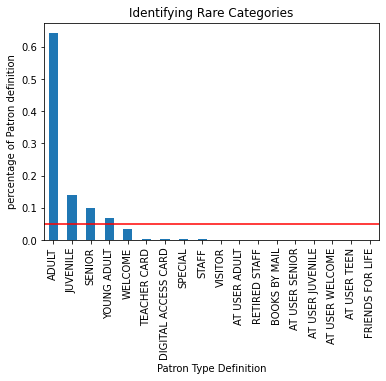

In [284]:
fig = cat_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Patron definition')
fig.set_xlabel('Patron Type Definition')
fig.set_title('Identifying Rare Categories')
plt.show()

By viewing the plot, it is evident that ADULT patrons are higher in frequency and constitute majorly to the dataset.The categories below the red line are rare categories that appear less 5% of the dataset.

**Distribution of continuous and discrete variables** -
using histograms, Q-Q plots and Boxplots to check the distribution of continuous varaibles.

In [285]:
def diagnostic_plots(mydata, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 1)
    sns.histplot(mydata[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 2)
    sns.boxplot(y=mydata[variable])
    plt.title('Boxplot')

    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 3)
    stats.probplot(mydata[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')

    plt.show()

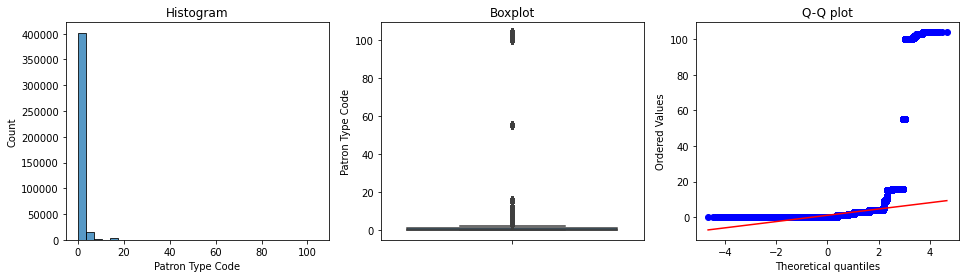

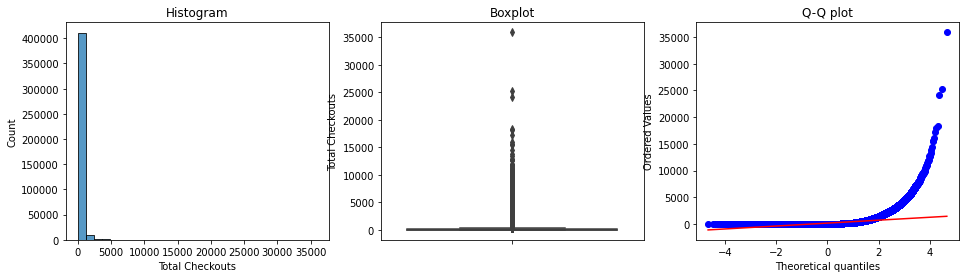

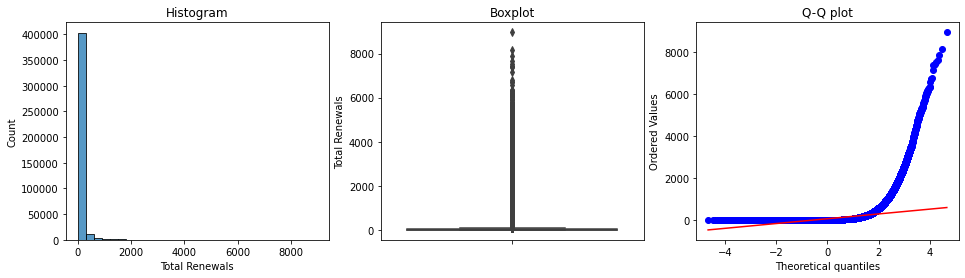

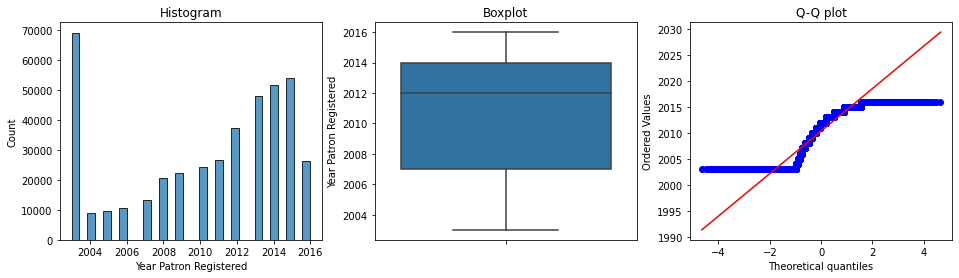

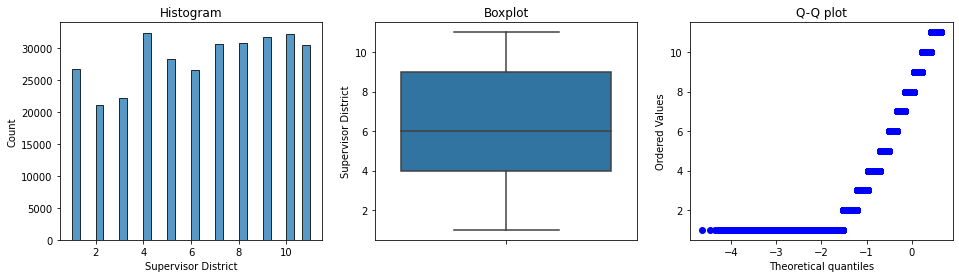

In [286]:
for var in continuous:
    diagnostic_plots(mydata, var)

1)From the first 3 QQ plots, there is high frequency in values,therefore its quantiles will increase slower in this region relative to the standard normal quantiles.
2)From the histogram,year 2003 there was more registration than in any of the years.It can be inferred that, they had more advertisemnts and attration towards visiting the building.
3)From Boxplots  2 and 3 , there isnt much of evidence for outlier in this huge dataset.

**Visualizing the data**

Text(0.5, 1.0, 'Average Score for Age Range by Total Checkouts')

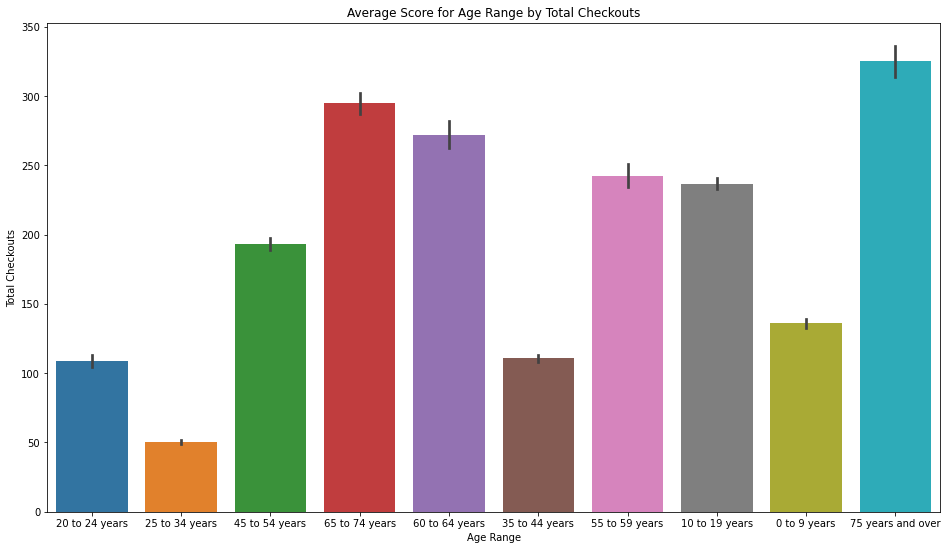

In [287]:
# Bar chart 
plt.figure(figsize=(16, 9))
sns.barplot(y=mydata['Total Checkouts'], x=mydata['Age Range'])
plt.title("Average Score for Age Range by Total Checkouts")

Text(0.5, 1.0, 'Average Score for Patron Type Definition by Total Renewals')

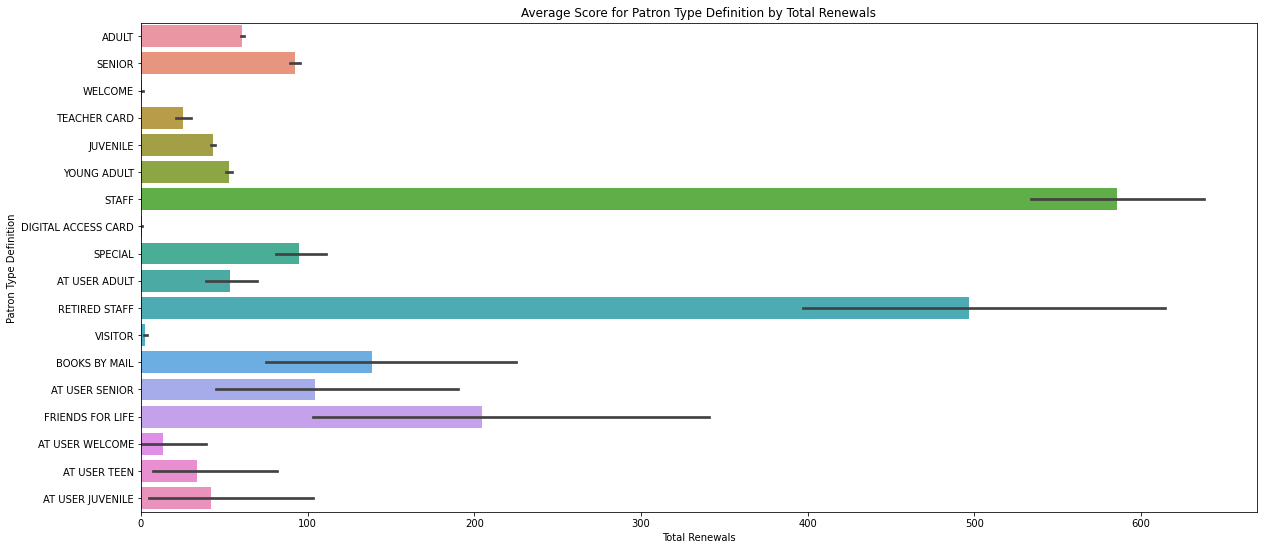

In [288]:
# Bar chart 2
plt.figure(figsize=(20, 9))
sns.barplot(x=mydata['Total Renewals'], y=mydata['Patron Type Definition'])
plt.title("Average Score for Patron Type Definition by Total Renewals")

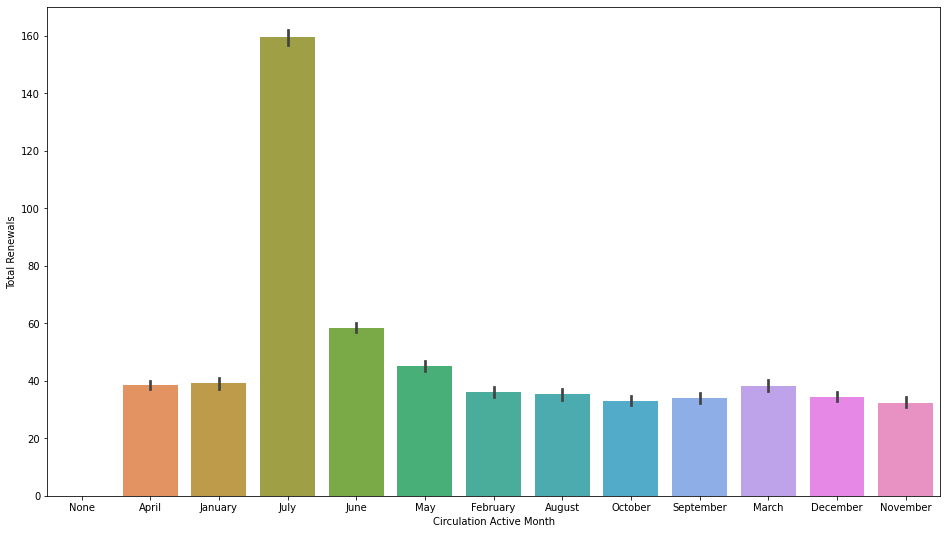

In [290]:
plt.figure(figsize=(16, 9))

sns.barplot(x=mydata['Circulation Active Month'], y=mydata['Total Renewals'])

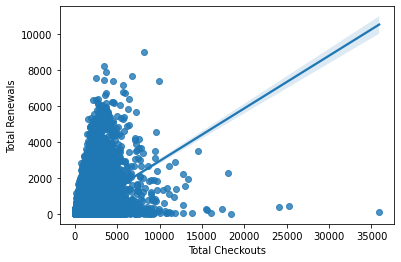

In [289]:
sns.regplot(x=mydata['Total Checkouts'], y=mydata['Total Renewals'])

In [ ]:
sns.swarmplot(x='Outside of County',y='Total Checkouts',data=mydata)

**Summary**


*   Out of all the datasets, I chose SF Library Usage data because I wanted to challenge myself by taking over 400k observations and working on a dataset that has many Null values and rare categories.

*   I will state the inferences I got from working on this dataset.I chose to do Explanatory data analysis part of the data as cleaning and visualizing tells more than any part.

*   From Bar chart2, the higher the Average Age, the greater the value of Total Renewals, and the high value of the increase in the age range between 65 and 74, And less Total Renewals between the Age range between 25 to 34. From this I would like to state that, there are less renewals for age range 25 to 34 , this might be due to working class, grad students.Age range 65-74 mostly dont fall into this category.

*   From Bar chart1, the higher the average age, the greater the value of Total Checkouts, and the high value of the increase in the age range between 65 and 75, And less Total Checkouts between the Age range between 25 to 34. This is similar to the Total Renewals, students, adults at this age range mostly belong to working category that might be a influencial factor for this.

*  I majorly stuck to variables that i considered to be influencial, so to make sure these go hand in hand I plotted the last graph.

* I also wanted to know whether the Circulation Month was a factor influencing renewals, by plotting bar char it is evident that there is high renewals in July and the lowest was October.This may be due to,Summer vacation falls in July and many grads, school students tend to purchase or renew at this point.But it is less in October, because considering the fact there are holidays during this month.

* Also the variable Outside of County is a major influencial variable when considering total checkouts and renewals.It is obvious that people residing in the county tend to checkout and renew as often than people residing outside of the county.

* I have also worked on this data set using R where I did basic EDA that provides the same answer that I have listed above.

*  I wanted to predict the Patron Type by using the age range,outside of county,home library definition but as the data needed more data cleaning and processing I wasn't able to proceed with time limit.












